**Prática de Segmentação de imagens**

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

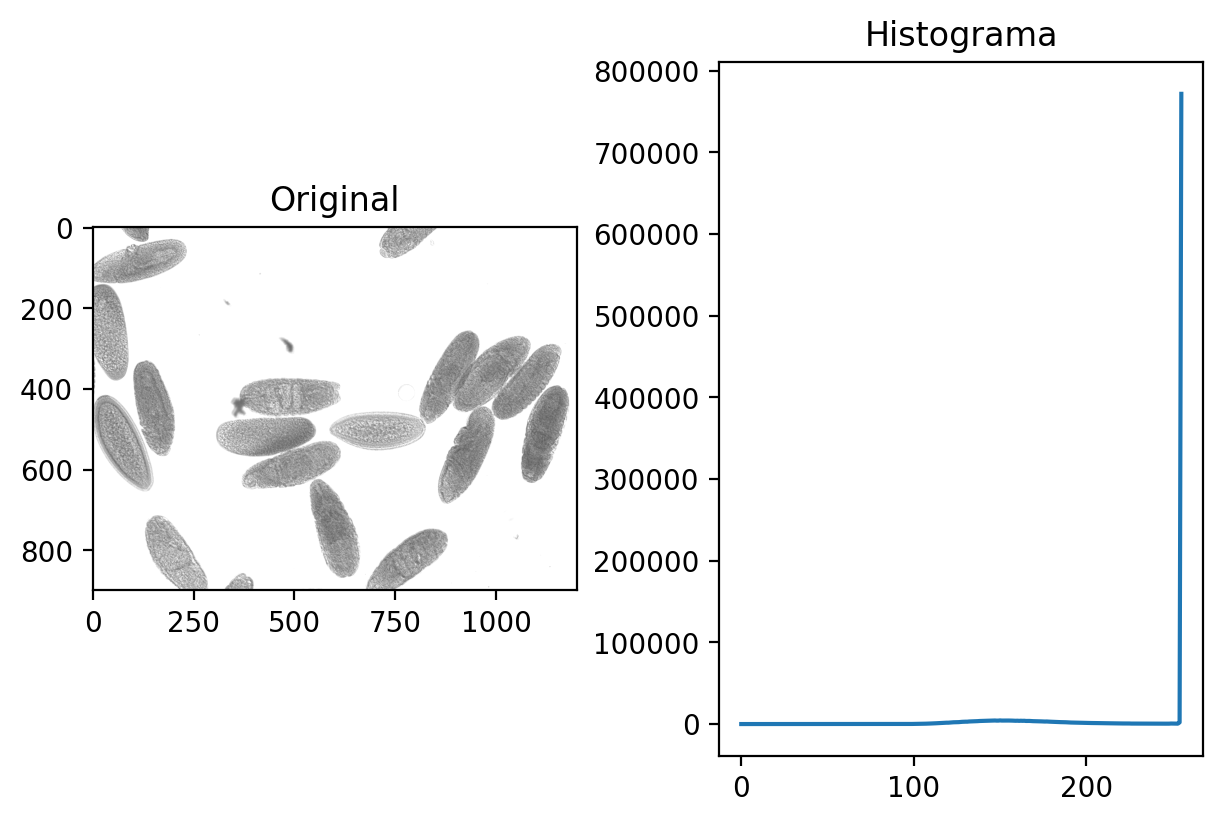

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

def histograma(img):
    hist = np.zeros(256)
    linhas, colunas = img.shape
    for x in range(linhas):
        for y in range(colunas):
            hist[img[x][y]] += 1
    return hist

hist = histograma(img)

fig, axes = plt.subplots(1,2, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Histograma")
axes[1].plot(hist)

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

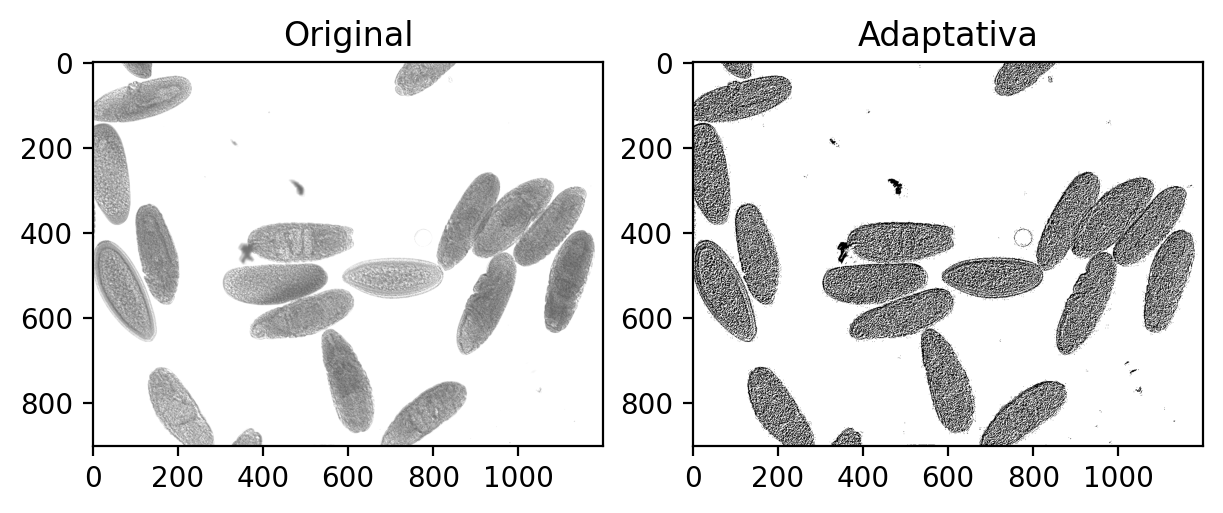

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

def get_adaptative_threshold(image, block):
  height, width = image.shape
  new_image = np.zeros((height, width), dtype=np.uint8)
  
  for i in range(height):
    for j in range(width):
      min_x = max(0, i - block // 2)
      max_x = min(height - 1, i + block // 2)
      min_y = max(0, j - block // 2)
      max_y = min(width - 1, j + block // 2)
      cluster = image[min_x: max_x, min_y: max_y]
      threshold = np.mean(cluster)

      if image[i, j] >= threshold:
        new_image[i, j] = 255

  return new_image

img_adapt = get_adaptative_threshold(img, 3)

fig, axes = plt.subplots(1,2, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Adaptativa")
axes[1].imshow(img_adapt, cmap='gray', vmin=0, vmax=255)

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

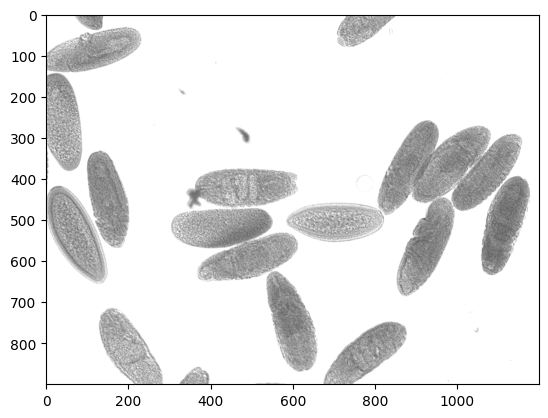

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1,1, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)

In [ ]:
4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

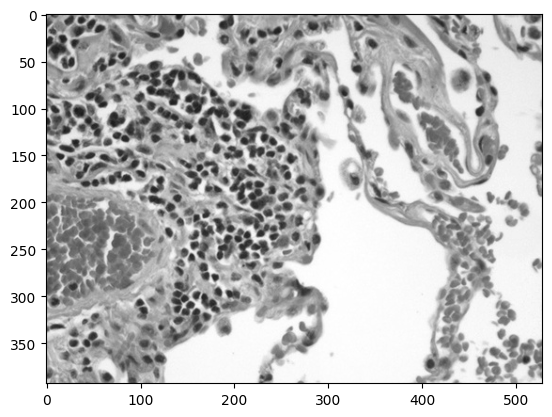

In [7]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);